In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

<p class="question"><span class="Q">Q.1</span> Import the file <code>./datasets/04-Mall_Customers.csv</code> using pandas:</p>

In [2]:
df = pd.read_csv('./datasets/04-Mall_Customers.csv')

In [3]:
df.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.columns = ['id', 'gender', 'age', 'income', 'score']
df.head(n=10)

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<p class="question"><span class="Q">Q.2</span> Plot the 3 columns Age, Annual Income, Spending Score using some convenient plot to see the relationship between them</p>

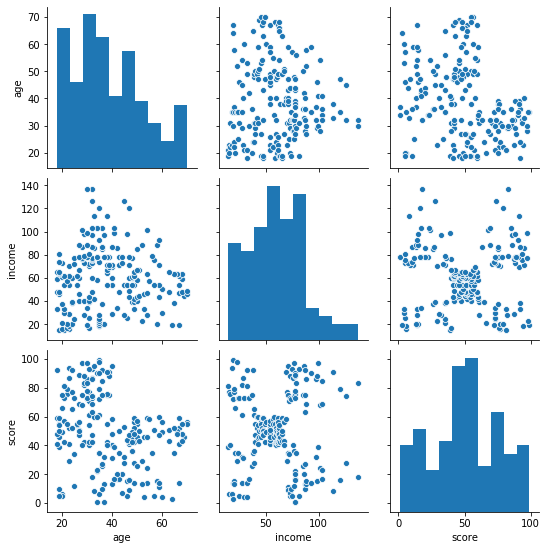

In [6]:
sns.pairplot(data=df.loc[:,'age':]);

<p class="question"><span class="Q">Q.3</span> Apply K-Means for <code>income</code> and <code>score</code> features using 5 Clusters</p>

In [7]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['income','score']]);

In [8]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

<p class="question"><span class="Q">Q.4</span> Plot the points again, but this time each different cluster should have a different color</p>

In [9]:
def plot_result(kmeans):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df['income'], y=df['score'], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

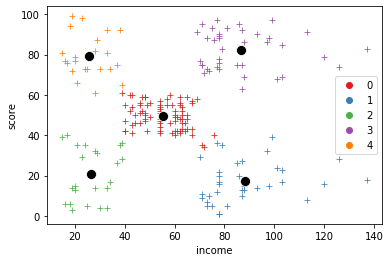

In [10]:
plot_result(kmeans)

<p class="question"><span class="Q">Q.5</span> In which cluster should a customer with $50,000 income and a spending score of 90? </p>

In [11]:
kmeans.predict([[50,90]])

array([4])

<p class="question"><span class="Q">Q.6</span> Use the elbow method to decide if the number of clusters is reasonable</p>

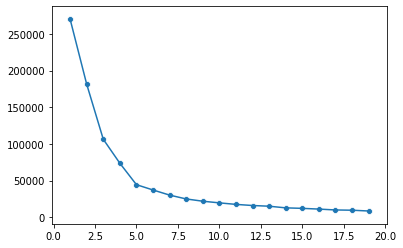

In [13]:
err = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['income','score']]);
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1]);